In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import wordcloud as wc
import collections
import seaborn as sbn
import nltk
import os
import collections
import itertools  
from wordcloud import STOPWORDS,WordCloud
from pandas import DataFrame, read_csv
from nltk import word_tokenize, BigramCollocationFinder
from nltk.corpus import stopwords as stopwords2
from nltk.stem import WordNetLemmatizer,PorterStemmer
from string import punctuation
from sklearn import svm,metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix,make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from IPython.display import HTML
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline
punctuation = list(punctuation)
punctuation.append('’')

In [2]:
directoryPath = r"C:\Users\nikol\Desktop\fulltext\data\\"
# directoryPath = r"C:\Users\myrto\Desktop\data\\"
categories = os.listdir(directoryPath)
categories.remove('README.TXT')

df = pd.DataFrame(columns=['id','title','content','category'])

id=0
for category in categories:
    path = directoryPath + category
    txtfiles = os.listdir(path)
    for txt in txtfiles:    
        filepath = path + "\\" + txt
        file = open(filepath,"r")
        filecontent = file.readlines()
        title = filecontent[0].replace("\n","")
        del filecontent[0]
        content = "".join(filecontent)
        df.loc[id] = [id,title,content,str(category)]
        id+=1
df.to_csv("final.csv")

In [65]:
# test_with_category = test.copy()
# test.drop(columns='category',inplace=True)
# train = train.reset_index()
# test = test.reset_index()
# test.drop(columns='index',inplace=True)
# train.drop(columns='index',inplace=True)
# train.to_csv("train_set.tsv",sep="\t")
# train.to_csv("test_set.tsv",sep="\t")

In [3]:
stopwordsPath = r"C:\Users\nikol\Desktop\Project-2-DataMining-\\english_stopwords.txt"
# stopwordsPath = r"C:\Users\myrto\Documents\GitHub\Project-2-DataMining-\english_stopwords.txt"
file = open(stopwordsPath,"r",errors='ignore')
stopwords_fromHub = [x.replace('\n',"") for x in file.readlines()]
stopwords = set(STOPWORDS)
stopwords2 =  set(stopwords2.words('english'))
stopwords.update(stopwords2)
stopwords.update(set(stopwords_fromHub))

# 1. WordClouds

In [11]:
def generate_WordCloud(data,stopwords):
    textWords = []
    for x in data:
        for y in word_tokenize(x) :
            y = y.lower()
            y = WordNetLemmatizer().lemmatize(y)
            if (y not in stopwords) and (y not in punctuation) and y.isalpha():
                textWords.append(y)
                
    counter = collections.Counter(textWords)
    words = WordCloud(background_color='white',stopwords=stopwords).generate_from_frequencies(frequencies=dict(counter))

    plt.figure(figsize=(20,10))
    plt.imshow(words,interpolation='bilinear')
    plt.axis("off")
    plt.show()

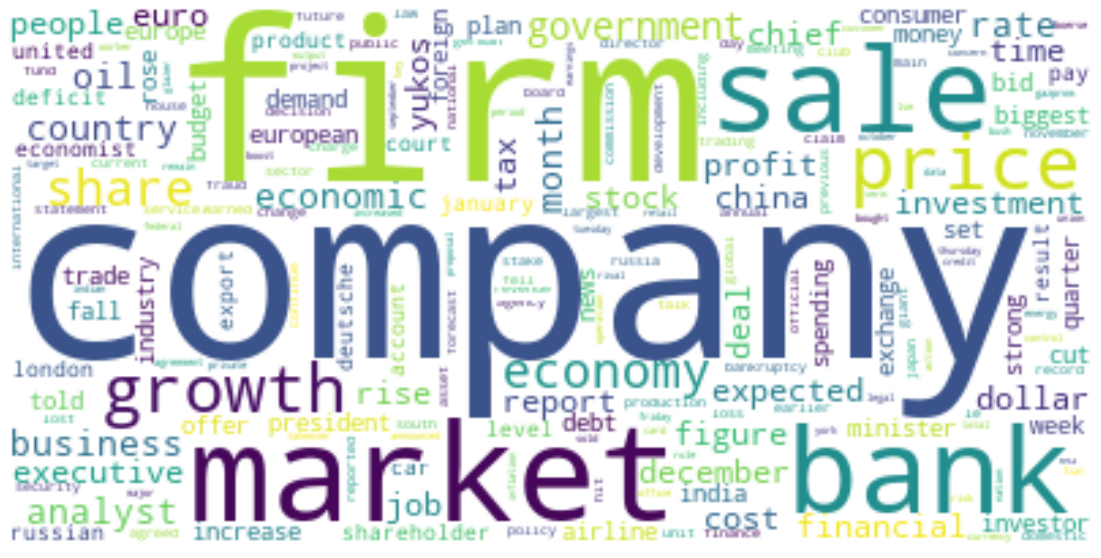

In [78]:
temp = df.loc[df['category'] == 'business']
generate_WordCloud(temp['content'],stopwords)

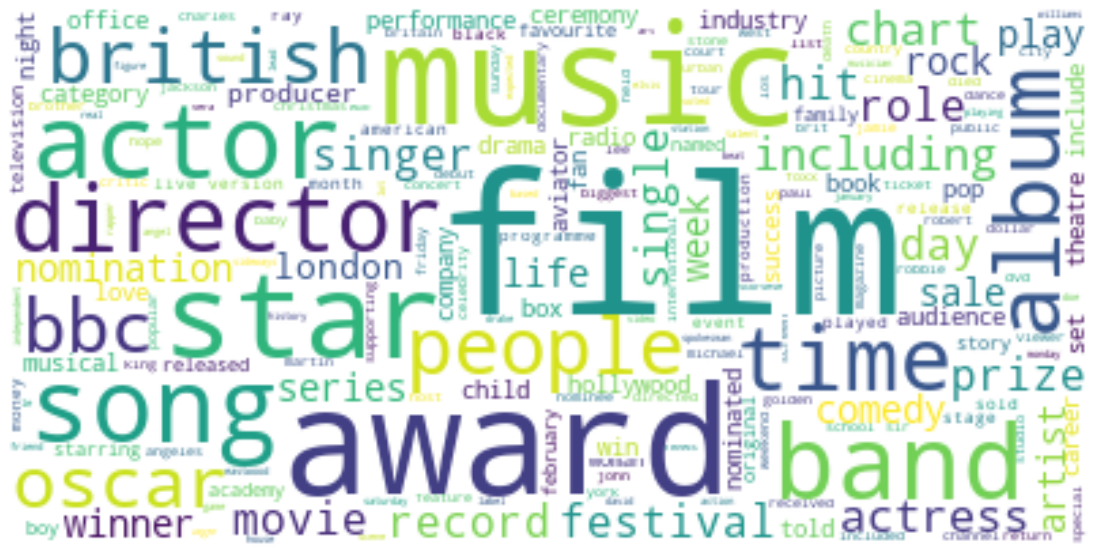

In [80]:
temp = df.loc[df['category'] == 'entertainment']
generate_WordCloud(temp['content'],stopwords)

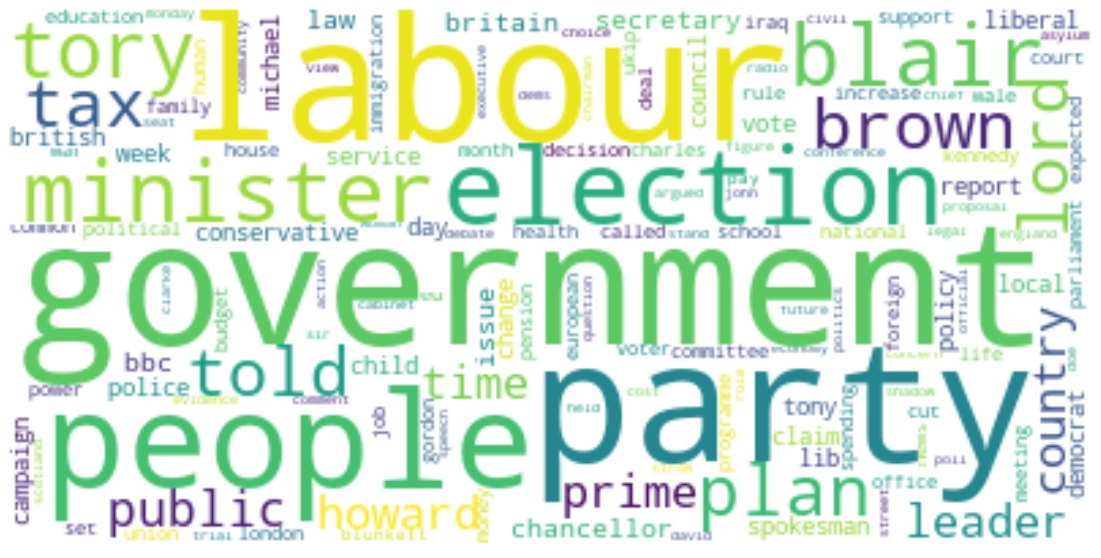

In [81]:
temp = df.loc[df['category'] == 'politics']
generate_WordCloud(temp['content'],stopwords)

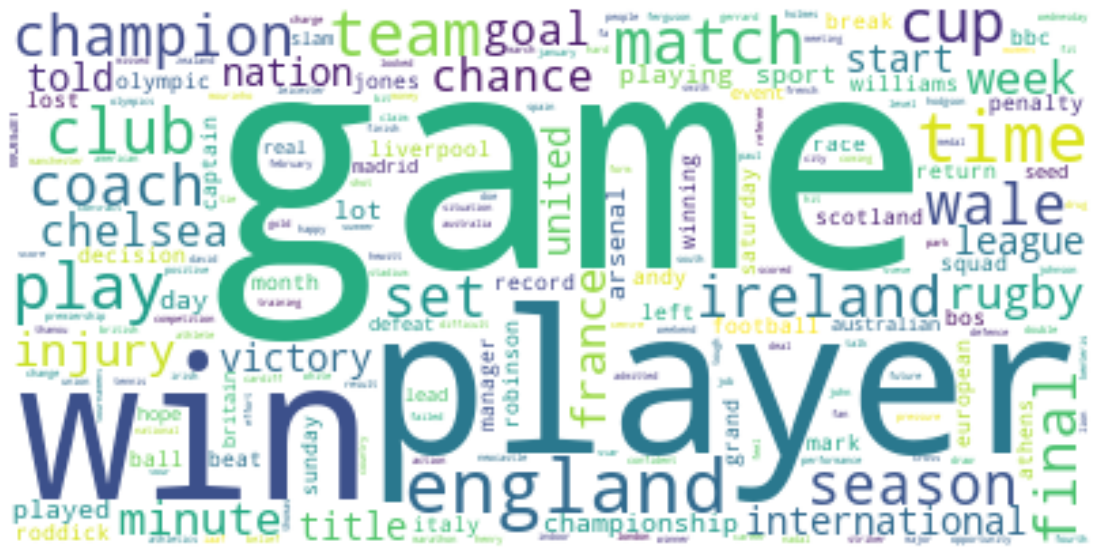

In [82]:
temp = df.loc[df['category'] == 'sport']
generate_WordCloud(temp['content'],stopwords)

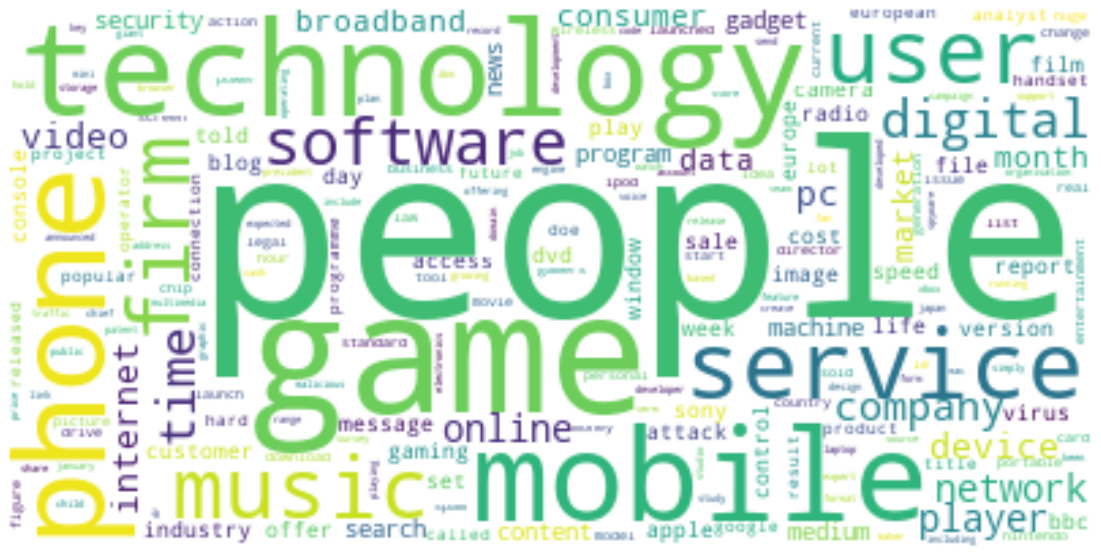

In [83]:
temp = df.loc[df['category'] == 'tech']
generate_WordCloud(temp['content'],stopwords)





#        2. Classification 






In [4]:
y = df['category']
X = df['content']

In [5]:
def vectorizeData(X_train,X_test,vectorizer):
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    return X_train,X_test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

le = preprocessing.LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

tfidfVectorizer = TfidfVectorizer(max_df=1.0,min_df=1,stop_words=stopwords)
tfidf_train,tfidf_test = vectorizeData(X_train,X_test,tfidfVectorizer)

bowVectorizer = CountVectorizer(stop_words=stopwords)
bow_train,bow_test = vectorizeData(X_train,X_test,bowVectorizer)

folds = StratifiedKFold(n_splits=10)

In [57]:
le.inverse_transform(y_train)
y_train
le.get_params(y_train)

{}

In [7]:
def estimator(estimator,parameter_grid ,X_train, X_test, y_train, y_test):
    grid = GridSearchCV(estimator,parameter_grid,cv=folds,refit=False,return_train_score=False,scoring=['accuracy','precision_macro','recall_macro','f1_macro'])
    grid.fit(X_train, y_train)  # fitting the model for grid search 
    tempDf = pd.DataFrame(grid.cv_results_)
    clf = OneVsRestClassifier(estimator)
    predictions = cross_val_predict(clf,Χ_test,y_test,cv=folds ,method='predict')
    create_ROCplot(5,predictions,y_test)
    return tempDf

In [8]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: darkred' if v else '' for v in is_max]




        * ------------- Support Vector Machines -------------- * 


 

In [ ]:
# SVM_param = {
#     'C': [0.1, 1, 10],  
#     'gamma': [1, 0.1, 0.01], 
#     'kernel': ['rbf','linear']
# }

SVM_param = {
    'C': [0.1],  
    'gamma': [ 0.01], 
    'kernel': ['rbf']
}

svmDf_tfidf = estimator(svm.SVC(),SVM_param,tfidf_train,tfidf_test, y_train, y_test)
svmDf_bow = estimator(svm.SVC(),SVM_param,bow_train,bow_test, y_train, y_test)
svmDf_tfidf.insert(0,'Vectorizer','Tf-idf')
svmDf_bow.insert(0,'Vectorizer','BoW')
svmDf_tfidf = svmDf_tfidf[['Vectorizer','param_C', 'param_gamma', 'param_kernel','mean_test_accuracy','mean_test_precision_macro','mean_test_recall_macro', 'mean_test_f1_macro']]
svmDf_bow = svmDf_bow[['Vectorizer','param_C', 'param_gamma', 'param_kernel','mean_test_accuracy','mean_test_precision_macro','mean_test_recall_macro', 'mean_test_f1_macro']]
svmDf = pd.concat([svmDf_tfidf,svmDf_bow],ignore_index=True)
svmDf.rename(columns={'param_C': 'C', 'param_gamma' : 'gamma', 'param_kernel':'Kernel','mean_test_accuracy':'Accuracy','mean_test_precision_macro':'Precision (macro)','mean_test_recall_macro':'Recall (macro)', 'mean_test_f1_macro':'F-Measure (macro)'},inplace=True)
svmDf.style.format("{:.2f}",subset=['param_C', 'param_gamma']).format("{:.2%}",subset=['Accuracy','Precision (macro)','Recall (macro)','F-Measure (macro)']).apply(highlight_max,subset=['Accuracy','Precision (macro)','Recall (macro)','F-Measure (macro)']).hide_index()

In [38]:
grid_predictions = grid.predict(X_test) 
# print classification report 
print(classification_report(y_test, grid_predictions))

precision    recall  f1-score   support

           0       0.99      0.97      0.98       102
           1       0.96      0.99      0.97        77
           2       0.93      0.99      0.96        84
           3       1.00      1.00      1.00       102
           4       1.00      0.94      0.97        80

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445



* ----------------------- *


        RandomForestClassifier


* ----------------------- *

[0 2 4 4 0 3 3 3 4 0 3 3 2 0 0 4 0 2 2 1 3 1 2 2 0 3 0 0 3 2 3 3 1 1 0 2 1
 2 0 3 2 1 3 2 2 0 4 0 2 0 1 0 0 3 0 0 4 1 0 3 3 2 0 4 2 3 0 3 0 0 0 2 4 0
 1 3 0 0 4 1 3 1 2 0 2 0 0 3 4 1 1 1 3 3 0 4 3 0 2 3 3 0 2 0 2 1 4 2 1 1 3
 3 4 3 1 1 2 1 1 2 3 2 1 3 0 1 4 3 3 0 3 2 4 0 3 3 0 2 2 4 2 1 4 3 2 2 4 2
 3 4 4 0 4 0 3 1 2 3 0 2 3 0 2 2 3 1 0 0 2 2 2 2 1 3 0 1 0 0 2 0 4 4 3 3 3
 4 1 1 0 3 4 1 1 1 0 3 3 0 0 4 3 3 0 2 0 4 4 1 2 2 0 0 0 1 1 4 4 0 0 0 2 4
 2 1 1 3 4 0 3 3 4 0 0 1 1 3 2 4 3 4 3 0 3 2 0 3 1 0 3 4 4 3 0 0 1 3 2 4 4
 4 2 2 3 4 1 3 1 1 4 4 4 4 3 3 2 4 2 1 2 4 1 0 2 2 4 0 0 0 2 2 3 3 4 0 4 2
 1 0 0 4 0 4 3 3 1 4 0 4 2 4 1 0 1 3 3 3 1 0 3 1 2 3 0 0 3 3 3 3 0 2 3 0 2
 2 1 4 4 0 1 4 4 2 3 2 0 3 1 1 3 1 1 4 4 3 3 4 3 3 3 0 2 1 4 0 2 2 0 0 3 0
 4 1 2 0 1 4 1 2 0 3 2 1 1 3 1 4 1 2 3 0 0 0 2 1 3 0 4 4 0 3 0 1 2 1 0 3 0
 3 4 1 2 1 4 3 4 3 4 1 3 3 2 2 1 3 4 0 2 3 4 3 3 3 0 4 3 2 1 2 1 2 3 4 0 4
 2]


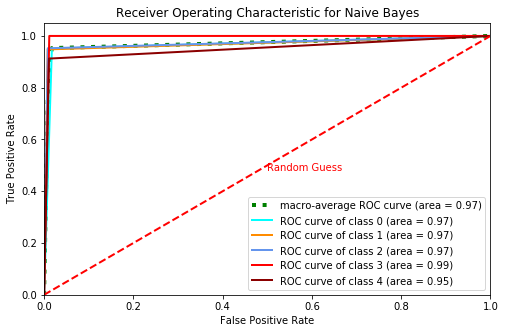

[0 2 4 4 0 3 3 3 4 0 3 3 2 0 0 2 0 2 2 1 3 1 2 2 0 3 0 0 3 2 3 3 1 1 0 2 1
 2 0 3 2 1 3 2 2 0 4 0 2 0 1 0 0 3 0 0 4 1 0 3 3 2 0 4 2 3 0 3 0 0 0 2 4 0
 1 3 0 0 4 1 3 1 2 0 2 0 0 3 4 1 1 1 3 3 0 4 3 0 2 3 3 0 2 0 2 1 4 2 1 1 3
 3 4 3 1 1 2 1 1 2 3 2 1 4 0 1 4 3 3 0 3 2 4 0 3 3 0 0 2 4 2 4 4 3 2 2 4 2
 3 4 4 0 4 0 3 1 2 3 0 2 3 4 2 2 3 1 0 0 2 2 2 2 1 3 0 1 0 0 2 0 4 4 3 3 3
 4 1 1 0 3 4 1 1 1 0 3 3 0 0 4 3 3 0 2 0 4 4 1 2 2 0 0 0 1 1 4 4 0 0 0 2 4
 2 1 1 3 4 0 3 3 4 0 0 1 1 3 2 4 3 4 3 4 3 2 0 3 1 0 3 4 4 3 0 1 1 3 2 4 4
 4 2 2 3 4 1 3 1 1 4 4 4 4 3 3 2 4 0 1 2 4 1 0 0 2 4 0 0 0 2 2 3 3 4 0 4 2
 1 0 0 4 0 4 3 3 1 4 0 4 2 4 1 0 1 3 3 3 1 0 3 1 2 3 0 0 3 3 3 3 0 2 3 0 2
 2 1 4 4 0 4 4 4 2 3 2 0 3 1 1 3 1 1 4 4 3 3 4 3 3 3 2 2 1 4 0 2 2 0 0 3 0
 4 1 2 0 1 4 1 2 0 3 2 1 1 3 1 4 1 2 3 0 0 0 2 1 3 0 4 4 0 3 0 1 2 1 0 3 0
 3 4 1 2 1 4 3 4 3 4 1 3 3 2 2 1 3 3 0 2 3 4 3 3 3 0 4 3 0 1 2 1 2 2 4 0 4
 2]


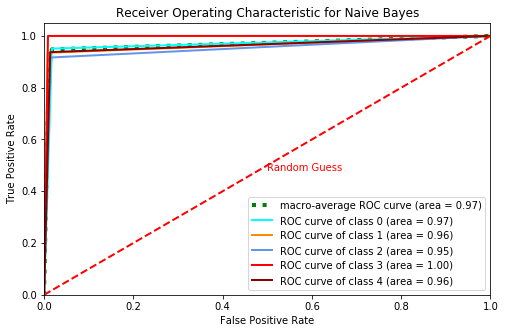

In [27]:
# randomForest_parameters = {
#     'n_estimators' : [1,10],
#     'criterion'    : ['gini','entropy']
# }
randomForest_parameters = {
    'n_estimators' : [1],
    'criterion'    : ['gini']
}

rfcDf_tfidf = estimator(RandomForestClassifier(),randomForest_parameters,tfidf_train, tfidf_test, y_train, y_test)
rfcDf_bow = estimator(RandomForestClassifier(),randomForest_parameters,bow_train, bow_test, y_train, y_test)
rfcDf_tfidf.insert(0,'Vectorizer','Tf-idf')
rfcDf_bow.insert(0,'Vectorizer','BoW')
rfcDf_tfidf = rfcDf_tfidf[['Vectorizer','param_n_estimators', 'param_criterion','mean_test_accuracy','mean_test_precision_macro','mean_test_recall_macro', 'mean_test_f1_macro']]
rfcDf_bow = rfcDf_bow[['Vectorizer','param_n_estimators', 'param_criterion','mean_test_accuracy','mean_test_precision_macro','mean_test_recall_macro', 'mean_test_f1_macro']]
rfcDf = pd.concat([rfcDf_tfidf,rfcDf_bow],ignore_index=True)
rfcDf.rename(columns={'param_n_estimators': 'n_estimators', 'param_criterion' : 'Criterion', 'mean_test_accuracy':'Accuracy','mean_test_precision_macro':'Precision (macro)','mean_test_recall_macro':'Recall (macro)', 'mean_test_f1_macro':'F-Measure (macro)'},inplace=True)
rfcDf.style.format("{:.2%}",subset=['Accuracy','Precision (macro)','Recall (macro)','F-Measure (macro)']).apply(highlight_max,subset=['Accuracy','Precision (macro)','Recall (macro)','F-Measure (macro)']).hide_index()


In [48]:
print(y_test)


print(predictions)

[0 2 4 4 0 3 3 3 1 0 3 3 2 0 0 4 0 2 2 1 3 1 2 2 0 3 0 0 3 2 3 3 1 4 0 2 1
 2 0 3 2 1 3 2 0 0 4 2 2 0 1 0 0 3 0 2 4 1 0 3 3 2 0 4 2 3 0 3 0 0 0 0 4 0
 1 3 0 0 4 1 4 1 2 0 2 0 0 3 4 1 1 1 3 3 0 4 3 0 2 3 3 4 2 0 2 1 4 2 1 1 3
 3 4 3 1 1 2 1 1 2 3 2 1 4 0 1 4 3 3 0 3 2 4 0 3 3 0 2 2 4 2 1 4 3 2 2 4 2
 3 4 4 0 4 0 3 1 2 3 0 2 3 4 2 2 3 1 0 0 2 2 2 2 1 3 0 1 0 0 2 0 2 4 3 3 3
 4 1 1 0 3 4 1 1 1 0 3 3 0 0 4 0 3 0 2 0 4 4 1 2 2 0 0 0 1 4 4 4 0 0 0 2 4
 2 1 1 3 4 0 3 3 4 0 0 1 1 3 2 4 3 4 3 4 3 2 0 3 1 0 3 4 4 3 0 1 1 3 2 4 4
 4 2 2 3 4 1 3 1 1 4 4 4 4 3 3 2 4 0 1 2 4 1 0 2 2 4 0 0 0 2 2 3 3 4 0 4 2
 1 0 0 4 0 4 3 3 1 4 0 4 2 4 1 0 2 3 3 3 1 0 3 1 2 3 0 0 3 3 3 3 0 2 3 0 2
 2 1 4 4 0 1 4 4 2 3 2 0 3 1 1 3 1 1 4 4 3 3 4 3 3 3 0 2 1 4 0 2 2 0 0 3 0
 4 1 2 0 1 4 1 2 0 3 2 1 1 3 1 4 1 2 3 0 0 0 2 1 3 0 4 4 0 3 0 1 2 1 0 3 0
 3 4 1 2 1 4 3 4 3 4 1 3 3 2 2 1 3 0 0 2 3 4 3 3 3 0 1 3 2 1 2 1 2 1 4 0 4
 2]
[[0.41025641 0.17948718 0.14102564 0.24358974 0.02564103]
 [0.16363636 0.04545455 0.51818182 0.1

In [34]:
# roc_withSplits(tfidf_test,predictions,clf,folds)

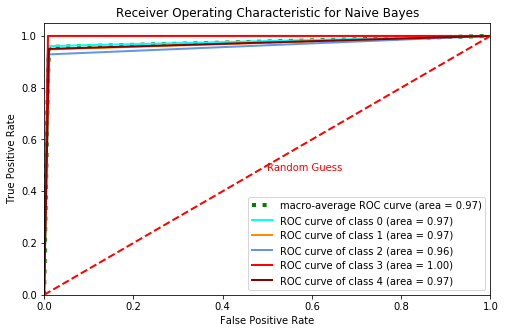

In [47]:
create_ROCplot(5,predictions,y_test)

In [36]:
print(y_score)
print(len(y_score))

[0 2 4 4 0 3 3 3 4 0 3 3 2 0 0 4 0 2 2 1 3 1 2 2 0 3 0 0 3 2 3 3 1 1 0 2 1
 2 0 3 2 1 3 2 0 0 4 0 2 0 1 0 0 3 0 0 4 1 0 3 3 2 0 4 2 3 0 3 0 0 0 2 4 0
 1 3 0 2 4 1 3 1 2 0 2 0 0 3 4 1 1 1 3 3 0 4 3 0 2 3 3 0 2 0 2 1 4 2 1 1 3
 3 4 3 1 1 2 1 1 2 3 2 1 4 0 1 4 3 3 0 3 2 4 0 3 3 0 0 2 4 2 4 4 3 2 2 4 2
 3 4 4 0 4 0 3 1 2 3 0 2 3 4 2 2 3 1 0 0 2 2 2 2 1 3 0 1 0 0 2 0 2 4 3 3 3
 4 1 1 0 3 4 1 1 1 0 3 3 0 0 4 3 3 0 2 0 4 4 1 2 2 0 0 0 1 1 4 4 0 0 0 2 4
 2 1 1 3 4 0 3 3 4 0 0 1 1 3 2 4 3 4 3 4 3 2 0 3 1 0 3 4 4 3 0 1 1 3 2 4 4
 4 2 2 3 4 1 3 1 1 4 4 4 4 3 3 2 4 2 1 2 4 1 0 2 2 4 0 0 0 2 2 3 3 4 0 4 2
 1 0 0 2 0 4 3 3 1 4 0 4 2 4 1 0 1 3 3 3 1 0 3 1 2 3 0 0 3 3 3 3 0 2 3 0 2
 2 1 4 4 0 1 4 4 2 3 2 0 3 1 1 3 1 1 4 4 3 3 4 3 3 3 2 2 1 4 0 2 2 0 0 3 0
 4 1 2 0 1 4 1 2 0 3 2 1 1 3 1 4 1 2 3 0 0 0 2 1 3 0 4 4 0 3 0 1 2 1 0 3 0
 3 4 1 2 1 4 3 4 3 4 1 3 3 2 2 1 3 3 0 2 3 4 3 3 3 0 4 3 2 1 2 1 2 2 4 0 4
 2]
445


* ----------------------- *


              Naive Bayes


* ----------------------- *

In [30]:
tfidf_train = tfidf_train.toarray()
tfidf_test = tfidf_test.toarray()
bow_train = bow_train.toarray()
bow_test = bow_test.toarray()
model = GaussianNB()

In [31]:
model.fit(tfidf_train,y_train)
predictions = model.predict(tfidf_test)
print("GaussianNB (precicion) = ",metrics.precision_score(y_test, predictions,average='macro'))
print("GaussianNB (f1)        = ",metrics.f1_score(y_test, predictions,average='macro'))
print("GaussianNB (recall)    = ",metrics.recall_score(y_test, predictions,average='macro'))
print("GaussianNB (accuracy)  = ",metrics.accuracy_score(y_test, predictions))

GaussianNB (precicion) =  0.921142649444425
GaussianNB (f1)        =  0.9216121716636371
GaussianNB (recall)    =  0.923412910618793
GaussianNB (accuracy)  =  0.9235955056179775


In [32]:
model.fit(bow_train,y_train)
predictions = model.predict(bow_test)
print("GaussianNB (precicion) = ",metrics.precision_score(y_test, predictions,average='macro'))
print("GaussianNB (f1)        = ",metrics.f1_score(y_test, predictions,average='macro'))
print("GaussianNB (recall)    = ",metrics.recall_score(y_test, predictions,average='macro'))
print("GaussianNB (accuracy)  = ",metrics.accuracy_score(y_test, predictions))

cv_results = cross_validate(model, bow_train, y_train,cv = folds,scoring = ['accuracy','precision_macro','recall_macro','f1_macro'])
print(cv_results)

GaussianNB (precicion) =  0.9231548150644537
GaussianNB (f1)        =  0.9238571970237942
GaussianNB (recall)    =  0.9256964604023429
GaussianNB (accuracy)  =  0.9258426966292135
{'fit_time': array([1.46695256, 1.59180355, 1.97726083, 1.38979411, 1.5512166 ,
       1.74666429, 1.57237768, 1.65786481, 1.60819459, 2.02286267]), 'score_time': array([0.50056028, 0.51695251, 0.5384717 , 0.47867441, 0.49210763,
       0.56117535, 0.51655102, 0.49666643, 0.50532985, 0.81960058]), 'test_accuracy': array([0.93820225, 0.9494382 , 0.93258427, 0.96067416, 0.93820225,
       0.93820225, 0.93820225, 0.92134831, 0.9494382 , 0.8988764 ]), 'test_precision_macro': array([0.9403003 , 0.95181397, 0.93175824, 0.96109244, 0.93662058,
       0.93860294, 0.93817523, 0.92078339, 0.950777  , 0.90210349]), 'test_recall_macro': array([0.93961216, 0.94979377, 0.93478083, 0.95995041, 0.93926788,
       0.94023928, 0.93926788, 0.9236459 , 0.94908207, 0.89653993]), 'test_f1_macro': array([0.93818218, 0.94936826, 0.9

In [33]:
cv_results

{'fit_time': array([1.46695256, 1.59180355, 1.97726083, 1.38979411, 1.5512166 ,
        1.74666429, 1.57237768, 1.65786481, 1.60819459, 2.02286267]),
 'score_time': array([0.50056028, 0.51695251, 0.5384717 , 0.47867441, 0.49210763,
        0.56117535, 0.51655102, 0.49666643, 0.50532985, 0.81960058]),
 'test_accuracy': array([0.93820225, 0.9494382 , 0.93258427, 0.96067416, 0.93820225,
        0.93820225, 0.93820225, 0.92134831, 0.9494382 , 0.8988764 ]),
 'test_precision_macro': array([0.9403003 , 0.95181397, 0.93175824, 0.96109244, 0.93662058,
        0.93860294, 0.93817523, 0.92078339, 0.950777  , 0.90210349]),
 'test_recall_macro': array([0.93961216, 0.94979377, 0.93478083, 0.95995041, 0.93926788,
        0.94023928, 0.93926788, 0.9236459 , 0.94908207, 0.89653993]),
 'test_f1_macro': array([0.93818218, 0.94936826, 0.93292172, 0.95965952, 0.93601318,
        0.93917983, 0.93693994, 0.91930743, 0.94900953, 0.89810974])}

In [54]:
splitDf = pd.DataFrame(cv_results)
meandf = {
    'Accuracy': [splitDf['test_accuracy'].mean()],
    'Precision' : [splitDf['test_precision_macro'].mean()],
    'Recall' : [splitDf['test_recall_macro'].mean()],
    'F-Measure' : [splitDf['test_f1_macro'].mean()]
}
splitDf

fit_time  score_time  test_accuracy  test_precision_macro  \
0  1.762381    0.477494       0.938202              0.940300   
1  1.763058    0.498023       0.949438              0.951814   
2  1.725503    0.583809       0.932584              0.931758   
3  1.690079    0.517755       0.960674              0.961092   
4  1.959443    0.636452       0.938202              0.936621   
5  1.949462    0.623225       0.938202              0.938603   
6  2.015966    0.653371       0.938202              0.938175   
7  2.115876    0.591116       0.921348              0.920783   
8  1.910119    0.550762       0.949438              0.950777   
9  1.962935    0.597994       0.898876              0.902103   

   test_recall_macro  test_f1_macro  
0           0.939612       0.938182  
1           0.949794       0.949368  
2           0.934781       0.932922  
3           0.959950       0.959660  
4           0.939268       0.936013  
5           0.940239       0.939180  
6           0.939268       0.936940  
7           0.923646       0.919307  
8           0.949082       0.949010  
9           0.896540       0.898110

In [53]:
meanDf = pd.DataFrame(data=meandf)
meanDf

Accuracy  Precision    Recall  F-Measure
0  0.936517   0.937203  0.937218   0.935869

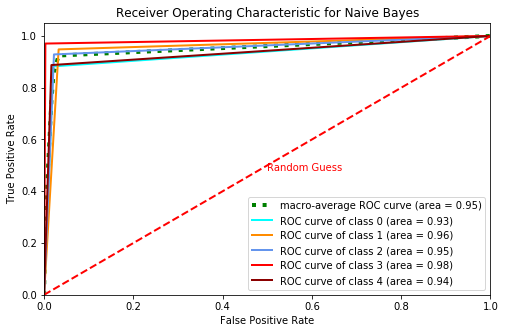

In [32]:
create_ROCplot(5,predictions,y_test)

Function that produses ROC-plot

In [119]:
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle

def create_ROCplot(n_classes,predictions,y_test):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(predictions))[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    lw=2
    plt.figure(figsize=(8,5))
    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='green', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','darkred'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.annotate('Random Guess',(.5,.48),color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Naive Bayes')
    plt.legend(loc="lower right")
    plt.show()


In [25]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold



def roc_withSplits(y_test,predictions,classifier,cv):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [114]:
def K_Nearest_Neighbour(k,vectorized_test,vectorized_train,X_train,X_test,y_train,y_test):

    similarity_matrix = cosine_similarity(vectorized_test,vectorized_train)
    test_list = X_test.index.tolist()
    train_list = X_train.index.tolist()
    category_list = y_train.tolist()
    predictions = []

    # n = get_neighbours(2112,2,train_list,test_list,category,similarity_matrix)
    # print(majorityVoting(n))
    for item in test_list:
        neighbours = get_neighbours(item,k,train_list,test_list,category_list,similarity_matrix)
        category = majorityVoting(neighbours)
        predictions.append(category)
    
    return predictions

predictions = K_Nearest_Neighbour(5,tfidf_test,tfidf_train,X_train,X_test,y_train,y_test)
print(p)
print(len(p))



[0, 2, 4, 4, 0, 3, 3, 3, 1, 0, 3, 3, 2, 0, 0, 4, 0, 2, 2, 1, 3, 1, 2, 2, 0, 3, 0, 0, 3, 2, 3, 3, 1, 4, 0, 2, 1, 2, 0, 3, 2, 1, 3, 2, 0, 0, 4, 3, 2, 0, 1, 0, 0, 3, 0, 2, 4, 1, 0, 3, 3, 2, 0, 4, 2, 3, 0, 3, 0, 2, 0, 2, 4, 0, 1, 3, 0, 2, 4, 1, 4, 1, 2, 0, 2, 0, 0, 3, 4, 1, 1, 1, 3, 3, 0, 4, 3, 0, 2, 3, 3, 4, 2, 0, 2, 1, 4, 2, 1, 1, 3, 3, 4, 3, 1, 1, 2, 1, 1, 2, 0, 2, 1, 4, 0, 1, 4, 3, 3, 0, 3, 2, 4, 0, 3, 3, 0, 2, 2, 4, 2, 1, 4, 3, 2, 2, 4, 2, 3, 4, 4, 0, 4, 0, 3, 1, 2, 3, 0, 2, 3, 0, 2, 2, 3, 1, 0, 0, 2, 2, 2, 0, 1, 3, 0, 1, 0, 0, 2, 0, 2, 4, 3, 3, 3, 0, 2, 1, 0, 3, 4, 4, 1, 1, 0, 3, 0, 0, 3, 4, 0, 3, 0, 2, 2, 4, 4, 4, 2, 2, 0, 0, 0, 1, 1, 4, 4, 0, 0, 0, 2, 4, 2, 1, 1, 3, 4, 0, 3, 3, 4, 0, 0, 1, 1, 3, 2, 4, 3, 4, 3, 4, 3, 2, 0, 3, 1, 0, 3, 4, 4, 3, 0, 1, 1, 3, 2, 1, 4, 4, 2, 2, 3, 4, 1, 3, 1, 1, 4, 4, 4, 4, 3, 3, 2, 4, 0, 1, 2, 4, 1, 0, 2, 2, 4, 0, 0, 0, 2, 2, 3, 3, 4, 0, 4, 2, 1, 0, 0, 2, 3, 4, 3, 3, 1, 4, 0, 4, 2, 4, 1, 0, 2, 3, 3, 3, 1, 0, 3, 1, 2, 3, 0, 3, 3, 3, 3, 3, 2, 2, 3, 0, 2, 

Knn (precicion) =  0.9390751149718957
 (f1)        =  0.937510697996969
GaussianNB (recall)    =  0.9380557677616501
GaussianNB (accuracy)  =  0.9370786516853933


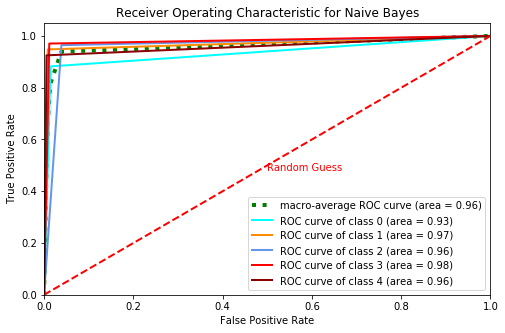

In [120]:
print("Knn (precicion) = ",metrics.precision_score(y_test, predictions,average='macro'))
print(" (f1)        = ",metrics.f1_score(y_test, predictions,average='macro'))
print("GaussianNB (recall)    = ",metrics.recall_score(y_test, predictions,average='macro'))
print("GaussianNB (accuracy)  = ",metrics.accuracy_score(y_test, predictions))
create_ROCplot(5,predictions,y_test)

In [118]:
def majorityVoting(neighbours):
    
    # print(neighbours)
    frequency = collections.Counter(t[1] for t in neighbours)
    # print(frequency)
    return frequency.most_common(1)[0][0]

In [117]:
def get_neighbours(item_id,topN,train_list,test_list,category_list,similarity_matrix):

    similarity_dictionary = {}
    wantedIndex = test_list.index(item_id)    

    for index in range(0,len(similarity_matrix[wantedIndex])):  # finding the most similar to the wanted id
        idtuple = (train_list[index],category_list[index])
        similarity_dictionary[idtuple] = similarity_matrix[wantedIndex][index]
        index+=1

    sortedDict = {k : similarity_dictionary[k] for k in sorted(similarity_dictionary,key = similarity_dictionary.get,reverse=True)}
    if topN>len(similarity_matrix[wantedIndex]): # checking if topN is greater that the size of list
     topN=len(similarity_matrix[wantedIndex])
    out = dict(itertools.islice(sortedDict.items(),topN))
    neighbours = []
    for k,v in out.items():
        neighbours.append(k)

    return neighbours